In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [58]:
data_train = pd.read_csv('input_data/train.csv')
data_test = pd.read_csv('input_data/test.csv')

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(data_train.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
data_test[data_test.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [6]:
print('Missing values')
for column in data_test.columns:
    missed_val_tr = data_train[column].isna().sum()
    missed_val_test = data_test[column].isna().sum()
    if (missed_val_tr) or (missed_val_test):
        print(f'{column}: \ttrain - {missed_val_tr}, \ttest - {missed_val_test}')

print(f'Total records: \n\ttrain - {data_train.shape[0]}, \n\ttest - {data_test.shape[0]}')

Missing values
MSZoning: 	train - 0, 	test - 4
LotFrontage: 	train - 259, 	test - 227
Alley: 	train - 1369, 	test - 1352
Utilities: 	train - 0, 	test - 2
Exterior1st: 	train - 0, 	test - 1
Exterior2nd: 	train - 0, 	test - 1
MasVnrType: 	train - 872, 	test - 894
MasVnrArea: 	train - 8, 	test - 15
BsmtQual: 	train - 37, 	test - 44
BsmtCond: 	train - 37, 	test - 45
BsmtExposure: 	train - 38, 	test - 44
BsmtFinType1: 	train - 37, 	test - 42
BsmtFinSF1: 	train - 0, 	test - 1
BsmtFinType2: 	train - 38, 	test - 42
BsmtFinSF2: 	train - 0, 	test - 1
BsmtUnfSF: 	train - 0, 	test - 1
TotalBsmtSF: 	train - 0, 	test - 1
Electrical: 	train - 1, 	test - 0
BsmtFullBath: 	train - 0, 	test - 2
BsmtHalfBath: 	train - 0, 	test - 2
KitchenQual: 	train - 0, 	test - 1
Functional: 	train - 0, 	test - 2
FireplaceQu: 	train - 690, 	test - 730
GarageType: 	train - 81, 	test - 76
GarageYrBlt: 	train - 81, 	test - 78
GarageFinish: 	train - 81, 	test - 78
GarageCars: 	train - 0, 	test - 1
GarageArea: 	train - 0, 	t

In [7]:
data_train.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [60]:
replace_col = ['MiscFeature','Fence','PoolQC','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond', 'BsmtQual','MasVnrType','Alley'] # replace with NotApplicable

data_train[replace_col] = data_train[replace_col].fillna('NotApplicable', axis=1)
data_test[replace_col] = data_test[replace_col].fillna('NotApplicable', axis=1)

In [75]:
data_train.isna().any(axis=1).sum()

259

In [62]:
data_test[data_test.MasVnrArea.isna()][['Id', 'MasVnrType', 'MasVnrArea']]

,Id,MasVnrType,MasVnrArea
231,1692,NotApplicable,NaN
246,1707,NotApplicable,NaN
422,1883,NotApplicable,NaN
532,1993,NotApplicable,NaN
544,2005,NotApplicable,NaN
581,2042,NotApplicable,NaN
851,2312,NotApplicable,NaN
865,2326,NotApplicable,NaN
880,2341,NotApplicable,NaN
889,2350,NotApplicable,NaN


In [63]:
data_train.MasVnrArea.fillna(0, inplace=True)
data_test.MasVnrArea.fillna(0, inplace=True)

In [72]:
columns_for_dropna = []
print('Missing values')
for column in data_test.columns:
    missed_val_tr = data_train[column].isna().sum()
    missed_val_test = data_test[column].isna().sum()
    if (missed_val_tr) or (missed_val_test):
        columns_for_dropna.append(column)
        print(f'{column}: \ttrain - {missed_val_tr}, \ttest - {missed_val_test}')

print(f'Total records: \n\ttrain - {data_train.shape[0]}, \n\ttest - {data_test.shape[0]}')
print('All columns wit NA: ', columns_for_dropna)

Missing values
MSZoning: 	train - 0, 	test - 4
LotFrontage: 	train - 259, 	test - 227
Utilities: 	train - 0, 	test - 2
Exterior1st: 	train - 0, 	test - 1
Exterior2nd: 	train - 0, 	test - 1
BsmtFinSF1: 	train - 0, 	test - 1
BsmtFinSF2: 	train - 0, 	test - 1
BsmtUnfSF: 	train - 0, 	test - 1
TotalBsmtSF: 	train - 0, 	test - 1
Electrical: 	train - 1, 	test - 0
BsmtFullBath: 	train - 0, 	test - 2
BsmtHalfBath: 	train - 0, 	test - 2
KitchenQual: 	train - 0, 	test - 1
Functional: 	train - 0, 	test - 2
GarageCars: 	train - 0, 	test - 1
GarageArea: 	train - 0, 	test - 1
SaleType: 	train - 0, 	test - 1
Total records: 
	train - 1460, 
	test - 1459
All columns wit NA:  ['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [73]:
columns_for_dropna.remove('LotFrontage')
print(columns_for_dropna)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [74]:
data_train.dropna(inplace=True, subset=columns_for_dropna)
data_test.dropna(inplace=True, subset=columns_for_dropna)

In [76]:
categ_numeric_feat = ['MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd']

cont_features = list(set([x for x in data_train.columns if ((data_train[x].dtype == 'int64') or (data_train[x].dtype == 'float64'))]) - set(categ_numeric_feat) -  {'Id'} - {'SalePrice'})
categ_features = [x for x in data_train.columns if data_train[x].dtype == 'object'] + categ_numeric_feat

print('categorical features\n', categ_features)
print('continuous features\n', cont_features)
#print(set(data_train.columns.to_list()) - set(cont_features) - set(categ_numeric_feat) - set(categ_features))

categorical features
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
continuous features
 ['ScreenPorch', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', '2ndFlrSF', 'BsmtFinSF2', 'MoSold', 'BsmtUnfSF', 'YrSold', 'PoolArea', 'BsmtFinSF1', 'OpenPorchSF',

In [77]:
for i in cont_features:
    print(f'{i} - {data_train[i].unique().__len__()}')

ScreenPorch - 76
GrLivArea - 861
GarageCars - 5
YearBuilt - 112
TotalBsmtSF - 721
LowQualFinSF - 24
GarageArea - 441
WoodDeckSF - 274
2ndFlrSF - 417
BsmtFinSF2 - 144
MoSold - 12
BsmtUnfSF - 780
YrSold - 5
PoolArea - 8
BsmtFinSF1 - 637
OpenPorchSF - 202
LotFrontage - 111
YearRemodAdd - 61
1stFlrSF - 752
MiscVal - 21
EnclosedPorch - 120
MasVnrArea - 327
3SsnPorch - 20
LotArea - 1072
Fireplaces - 4


In [78]:
data_train[cont_features].describe().loc[['min', 'max']].T

,min,max
ScreenPorch,0.0,480.0
GrLivArea,334.0,5642.0
GarageCars,0.0,4.0
YearBuilt,1872.0,2010.0
TotalBsmtSF,0.0,6110.0
LowQualFinSF,0.0,572.0
GarageArea,0.0,1418.0
WoodDeckSF,0.0,857.0
2ndFlrSF,0.0,2065.0
BsmtFinSF2,0.0,1474.0


In [79]:
scaler = StandardScaler().fit(data_train[cont_features])
data_train_sc = data_train.copy()
data_train_sc[cont_features] = scaler.transform(data_train[cont_features])
data_test_sc = data_test.copy()
data_test_sc[cont_features] = scaler.transform(data_test[cont_features])

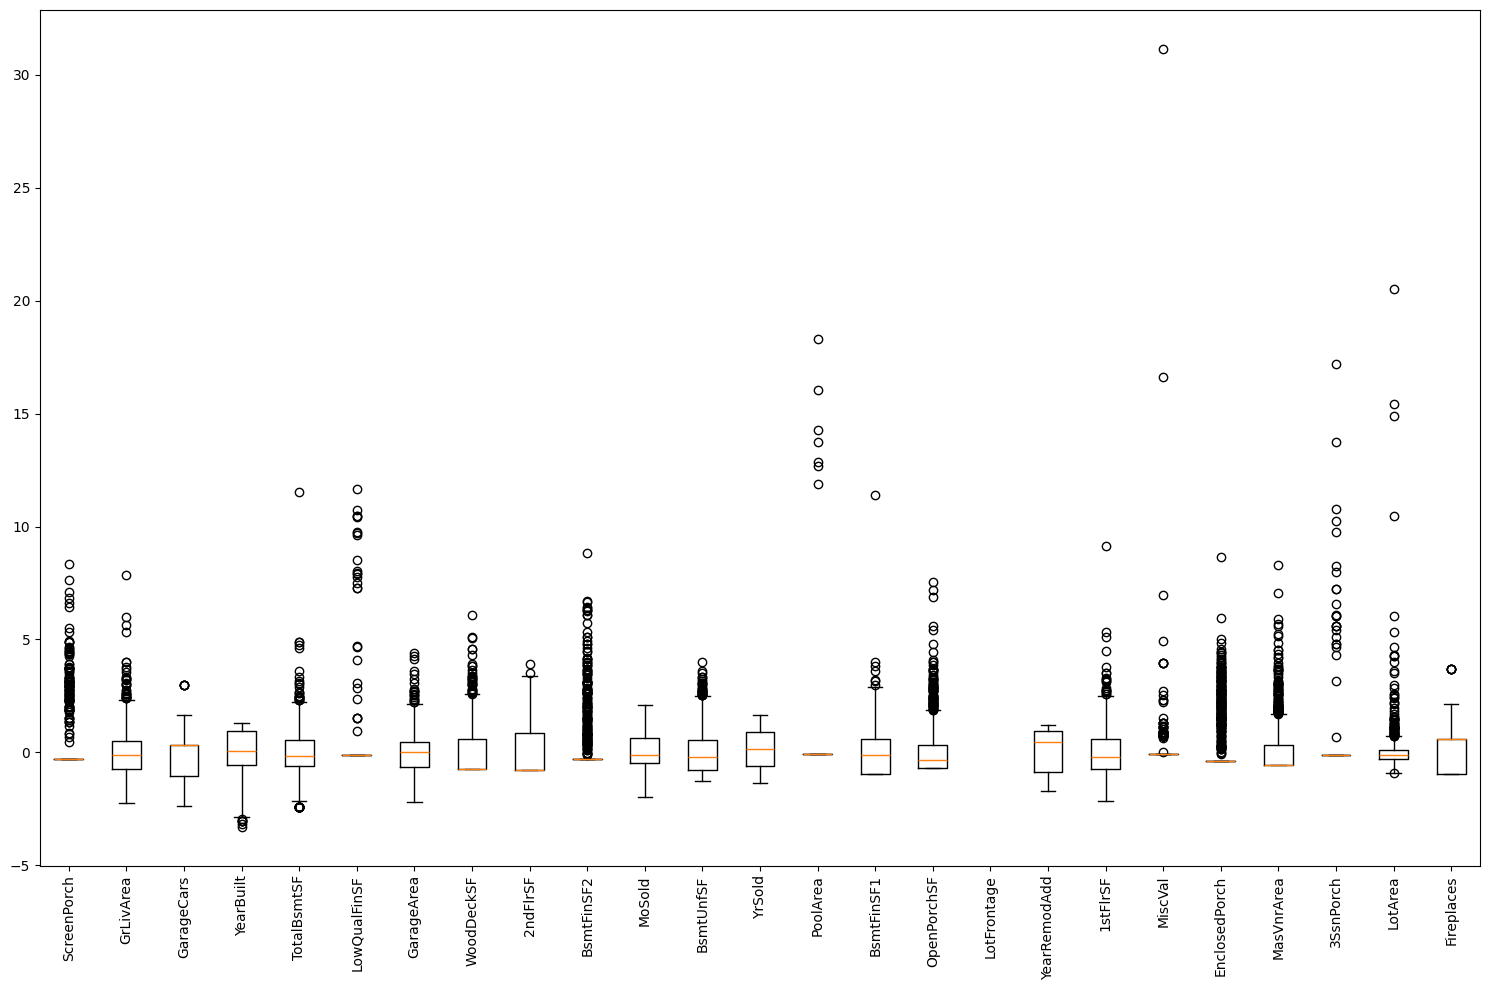

In [82]:
plt.figure(figsize=(15, 10))
plt.boxplot(data_train_sc[cont_features])
plt.xticks(range(1, 26), cont_features, rotation=90)
plt.tight_layout()

In [83]:
data_train_sc[cont_features].describe().loc[['min', 'max']].T

,min,max
ScreenPorch,-0.270308,8.338628
GrLivArea,-2.248549,7.852869
GarageCars,-2.364495,2.988179
YearBuilt,-3.287400,1.283770
TotalBsmtSF,-2.413344,11.525268
LowQualFinSF,-0.120284,11.643735
GarageArea,-2.212527,4.419954
WoodDeckSF,-0.751887,6.085586
2ndFlrSF,-0.794554,3.936683
BsmtFinSF2,-0.288760,8.848661


In [89]:
data_train.GarageYrBlt.unique

<bound method Series.unique of 0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1459, dtype: object>

In [86]:
data_train["MSSubClass"]= data_train["MSSubClass"].apply(str) # Converting MSSubClass to string as it is a categorical variable
data_test["MSSubClass"]= data_test["MSSubClass"].apply(str)


discrete = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'GarageYrBlt']
ordinal = ['MSSubClass', 'Utilities', 'Street','LotShape', 'LandSlope', 'BsmtExposure', 'Functional', 'CentralAir', 'Electrical','GarageFinish','PavedDrive','Fence','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',  'KitchenQual', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Alley','BsmtFinType1','BsmtFinType2']

# Separating continous and discrete variables 
continous = data_train.select_dtypes(include=['float64', 'int64']).columns.values.tolist()
for var in discrete:
    if var in continous:
        continous.remove(var)

# Separating nominal and ordinal variables
nominal = data_train.select_dtypes(include='object').columns.values.tolist()
for var in ordinal:
    if var in nominal:
        nominal.remove(var)

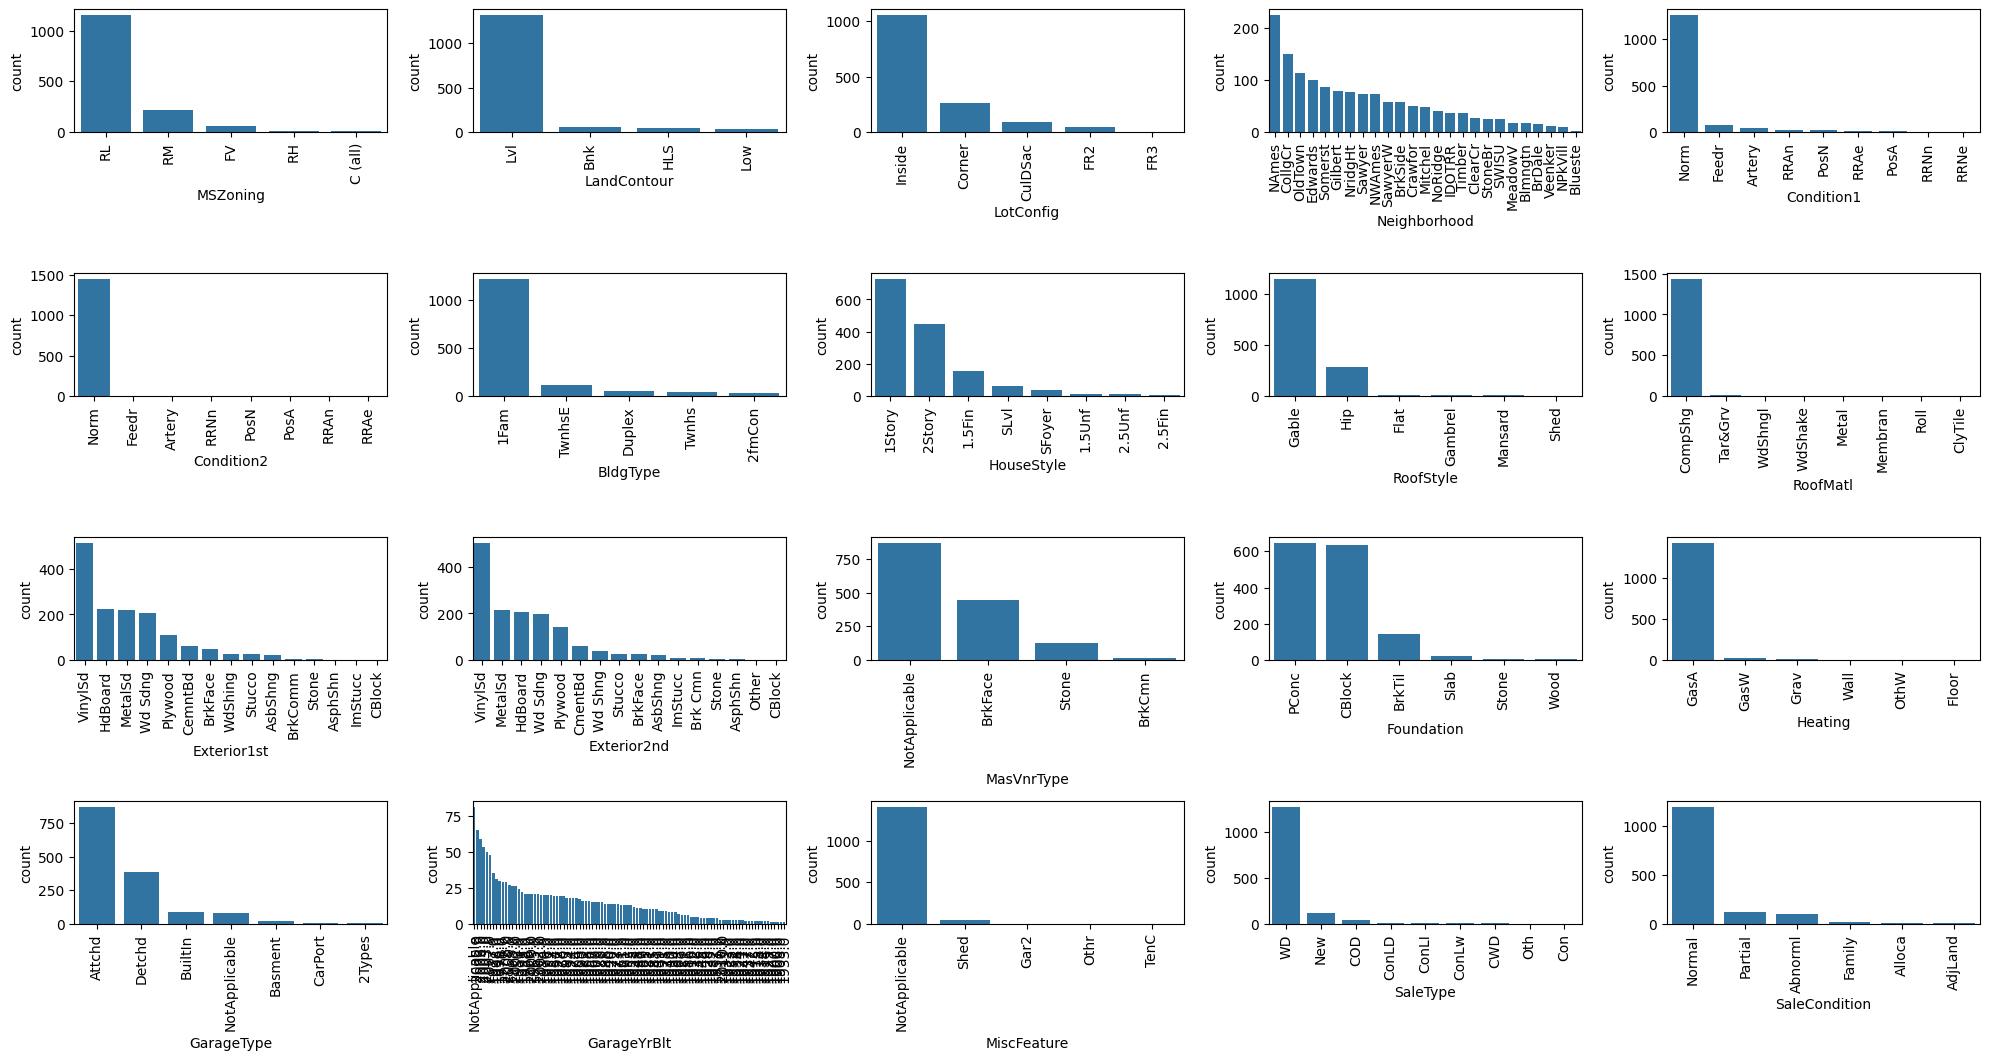

In [87]:
fig = plt.figure(figsize=(20, 20))
for index, var in enumerate(nominal):
    plt.subplot(8,5,index+1)
    sns.countplot(x=var, data=data_train, order=data_train[var].value_counts().index)
    plt.xticks(rotation=90)
plt.tight_layout()

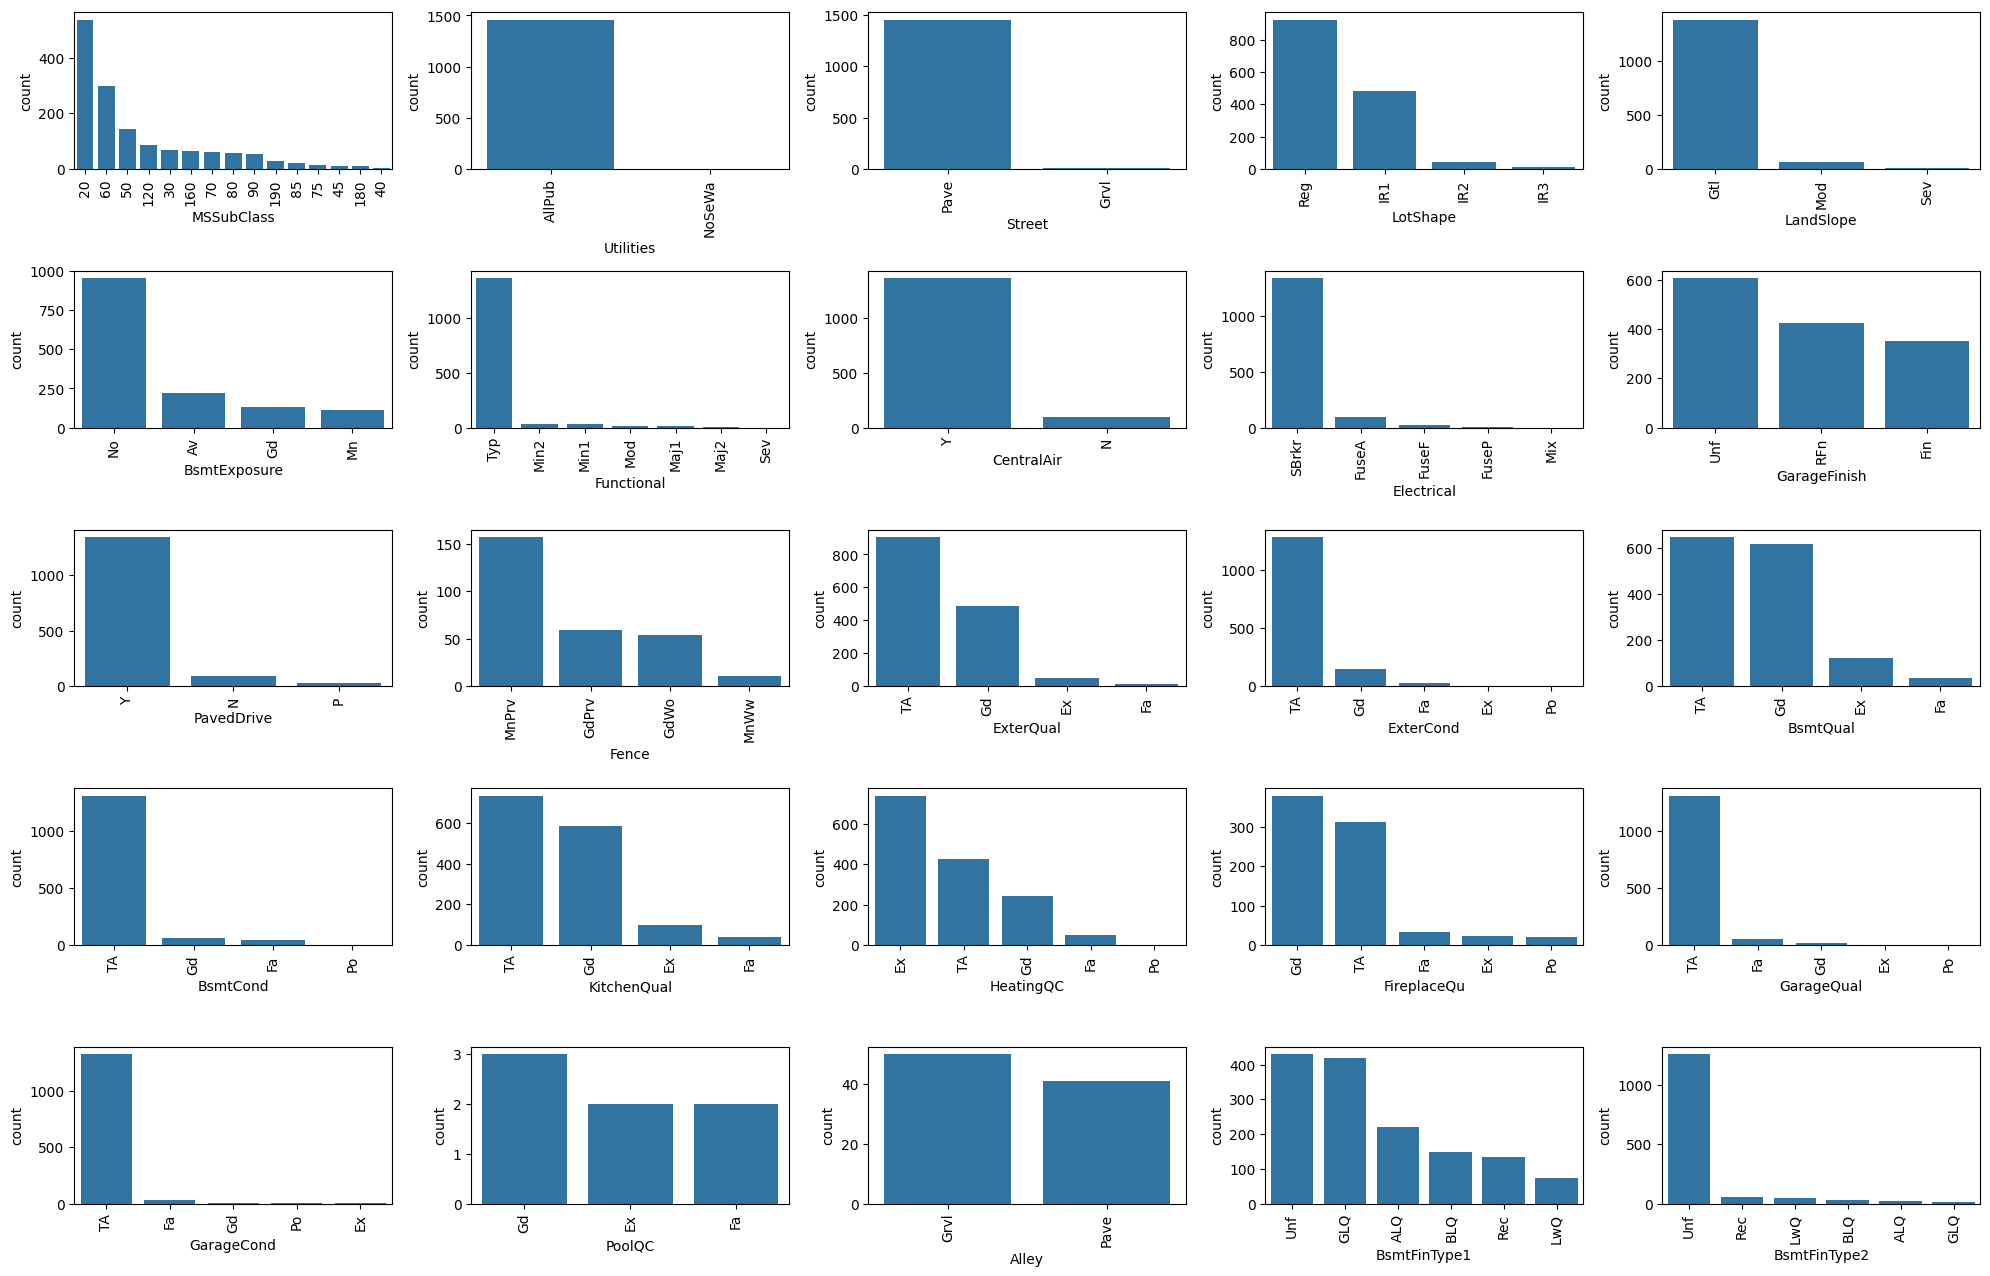

In [14]:
fig = plt.figure(figsize=(20,20))
for index, var in enumerate(ordinal):
    plt.subplot(8, 5, index+1)
    sns.countplot(x=var, data=data_train, order=data_train[var].value_counts().index)
    plt.xticks(rotation=90)
plt.tight_layout()

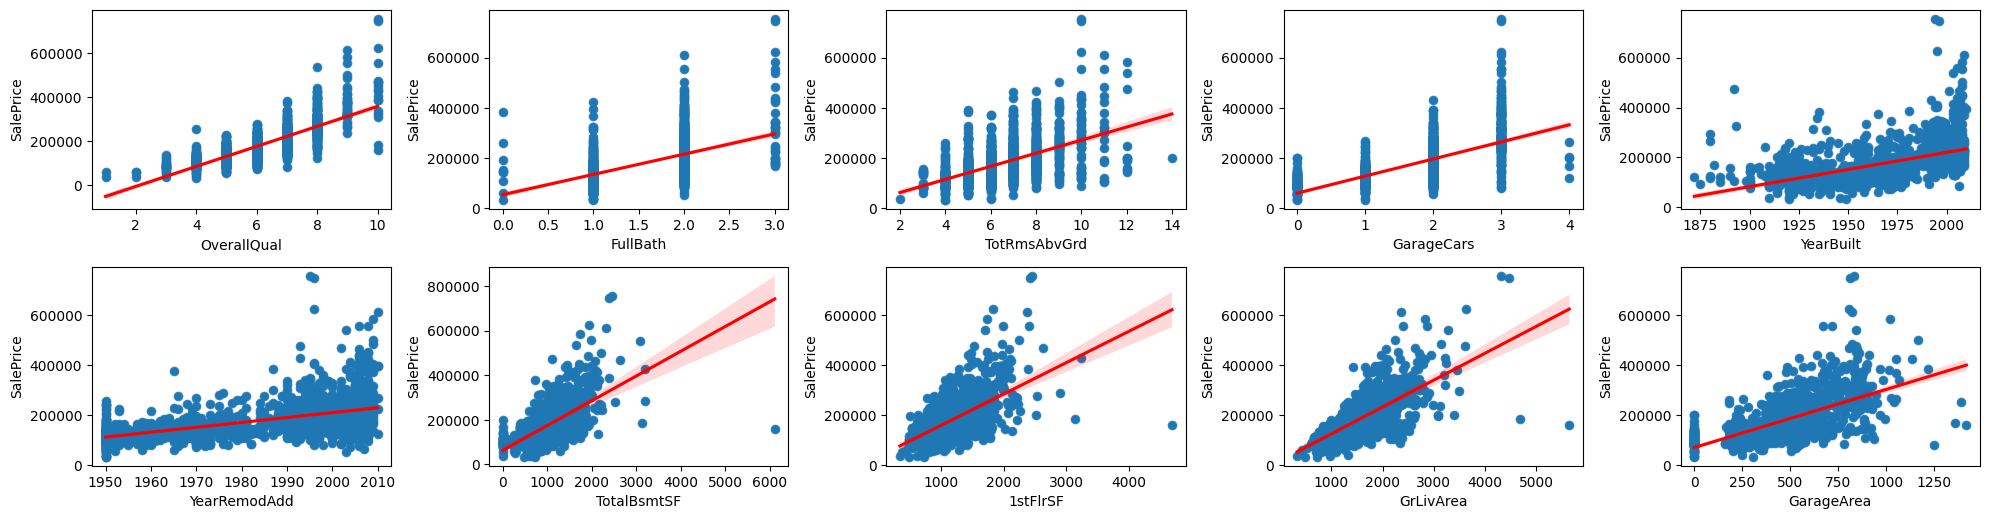

In [50]:
tmp = data_train[discrete+continous].corr().loc['SalePrice']
i = 0
fig = plt.figure(figsize=(20, 10))

for feat, val in zip(tmp.index, tmp.values):
    if 0.5 < val < 1:
        plt.subplot(4,5,i+1)
        sns.scatterplot(x=feat, y='SalePrice', data=data_train)
        sns.regplot(x=feat, y='SalePrice', data=data_train, line_kws={'color':'red'})
        i+=1
fig.tight_layout()